<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [2]:
# Load the data
data = pd.read_csv('HR_comma_sep.csv')
df = data.copy()

In [3]:
# Find the shape
df.shape

(14999, 10)

In [4]:
# Display the top 5 rows.
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years   dept  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
# Find the data types of columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [6]:
# Find the basic statistics
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [7]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [8]:
df.shape

(14999, 10)

In [9]:
for col in df.dtypes[df.dtypes=='object'].index:
    print(f"Value count for Column '{col}'")
    print(" ")
    print(df[col].value_counts())
    print(" ")
    print("====================")

Value count for Column 'dept'
 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64
 
Value count for Column 'salary'
 
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
 


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

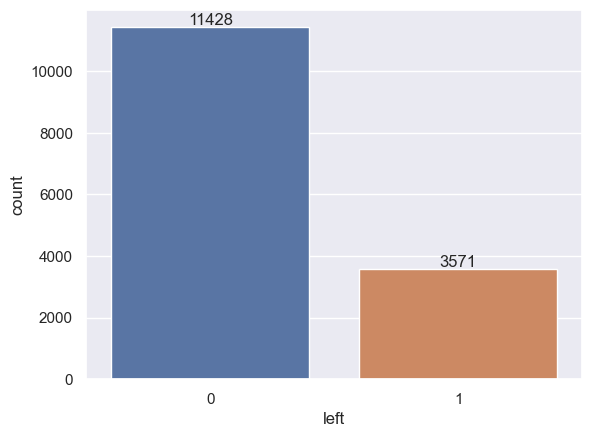

In [10]:
# Count of how many employees left the company
ax = sns.countplot(x='left', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Answer: There are 3571 employees left and their turn over is almost 23% 

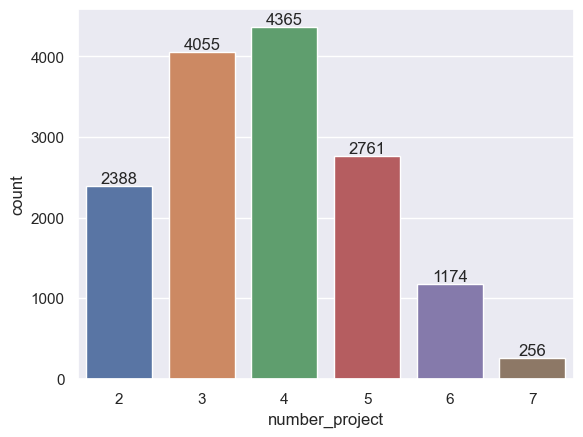

In [11]:
# Write code here
ax =sns.countplot(x='number_project',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


Answer: Most of the employees handle 3 to 4 projects.

In [12]:
df_proj = df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_proj

number_project  left      Perc
0                2     1  0.656198
1                2     0  0.343802
2                3     0  0.982244
3                3     1  0.017756
4                4     0  0.906300
5                4     1  0.093700
6                5     0  0.778341
7                5     1  0.221659
8                6     1  0.557922
9                6     0  0.442078
10               7     1  1.000000

**Task 5:** Make a plot of your findings (only turn-over employees)

<Axes: xlabel='number_project', ylabel='Perc'>

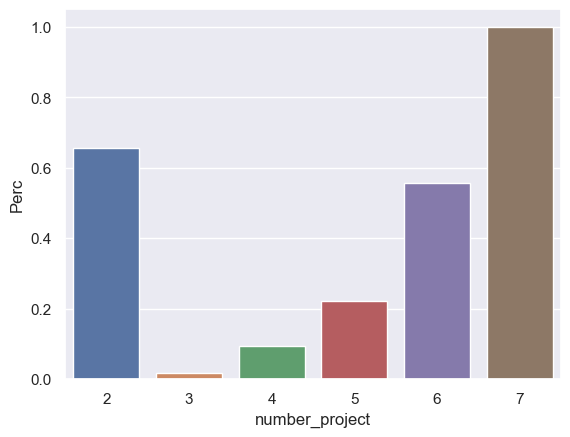

In [13]:
sns.barplot(x='number_project',y='Perc',data=df_proj[df_proj['left']==1])

Answer: The above graph shows that employees who handle 6,7 or 2 projects most likely to leave because of work overload

## **Time spent at the company**

<Axes: xlabel='time_spend_company', ylabel='count'>

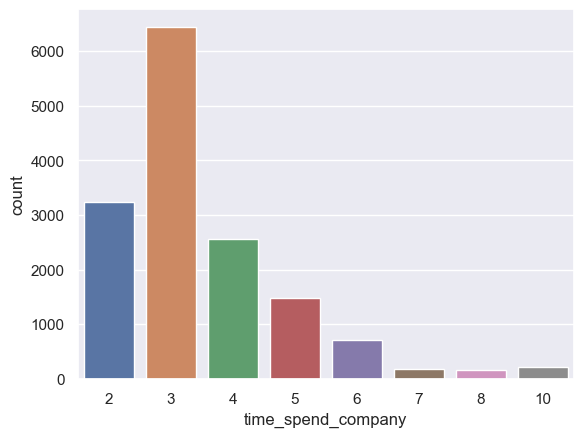

In [14]:
# Show the plot for the count of years here
sns.countplot(x='time_spend_company', data=df)

In [15]:
# Write the code here to get the percentage of employees leaving.
df_time = df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='perc')
df_time['perc'] = df_time['perc']*100
df_time

time_spend_company  left        perc
0                    2     0   98.366215
1                    2     1    1.633785
2                    3     0   75.384138
3                    3     1   24.615862
4                    4     0   65.193586
5                    4     1   34.806414
6                    5     1   56.551256
7                    5     0   43.448744
8                    6     0   70.891365
9                    6     1   29.108635
10                   7     0  100.000000
11                   8     0  100.000000
12                  10     0  100.000000

<Axes: xlabel='time_spend_company', ylabel='perc'>

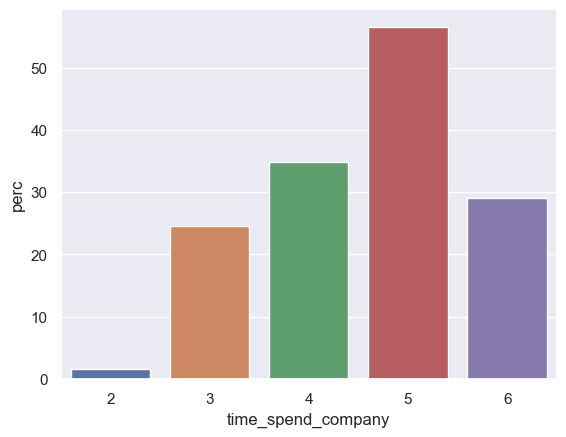

In [16]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.barplot(x='time_spend_company',y='perc',data=df_time[df_time['left']==1])

**Question: After what time period are employees most likely to leave the company ?**

Answer: 5 years is the  time period are employees most likely to leave the company

## **Employees engaged in any work accident**

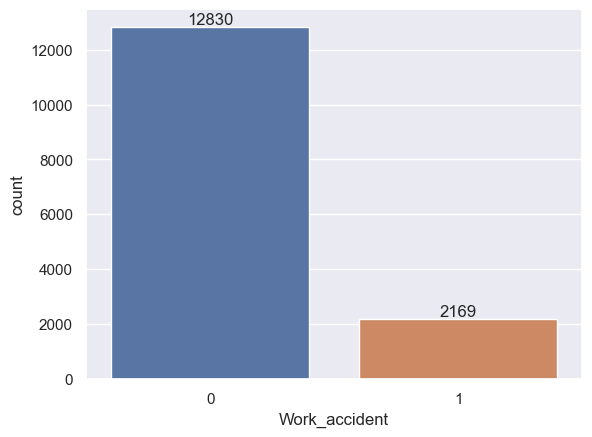

In [17]:
# Number of employees involved in work accident
ax = sns.countplot(x='Work_accident', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Answer: Not many employees have been victim ok Work accident

<Axes: xlabel='Work_accident', ylabel='count'>

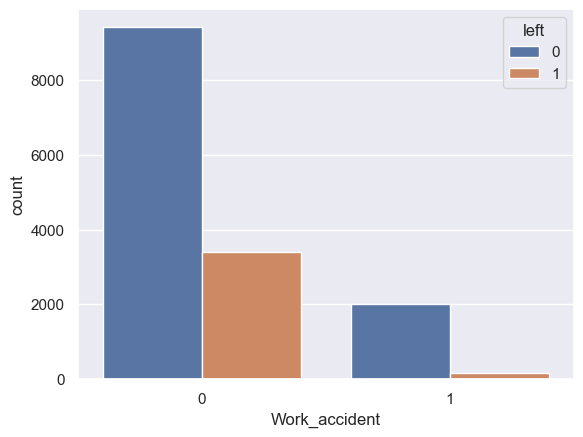

In [18]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident', data=df, hue='left')

## **Promotions in last 5 years**

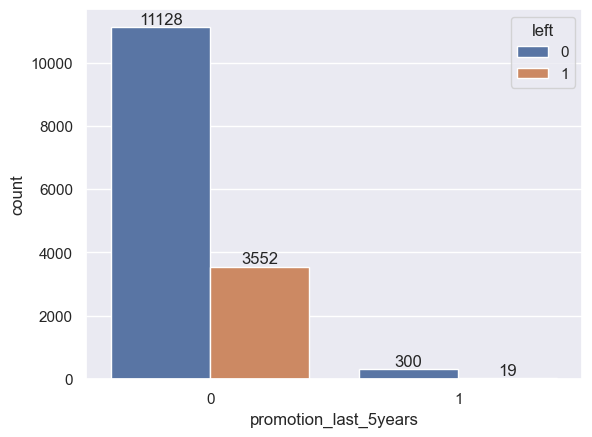

In [19]:
# Write code here
ax = sns.countplot(x='promotion_last_5years', data=df, hue='left')
for bars in ax.containers:
    ax.bar_label(bars)

Answer: most of employee not getting promotion are likely to leave and employees getting promotions are less and likely not leaving

## **Salary trends**

In [20]:
df.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   

   time_spend_company  Work_accident  left  promotion_last_5years   dept  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium

In [22]:
# Write code here
df_salary = df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_salary['Perc'] = df_salary['Perc']*100
df_salary

salary  left       Perc
0    high     0  93.371059
1    high     1   6.628941
2     low     0  70.311646
3     low     1  29.688354
4  medium     0  79.568725
5  medium     1  20.431275

<Axes: xlabel='salary', ylabel='Perc'>

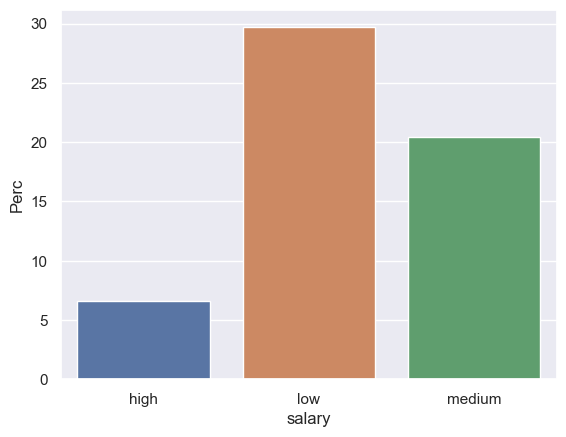

In [23]:
# Write code here for plot
sns.barplot(x='salary',y='Perc', data=df_salary[df_salary['left']==1])

Answer: People with low and medium salary most likely tend to leave

## **Employees per Department**

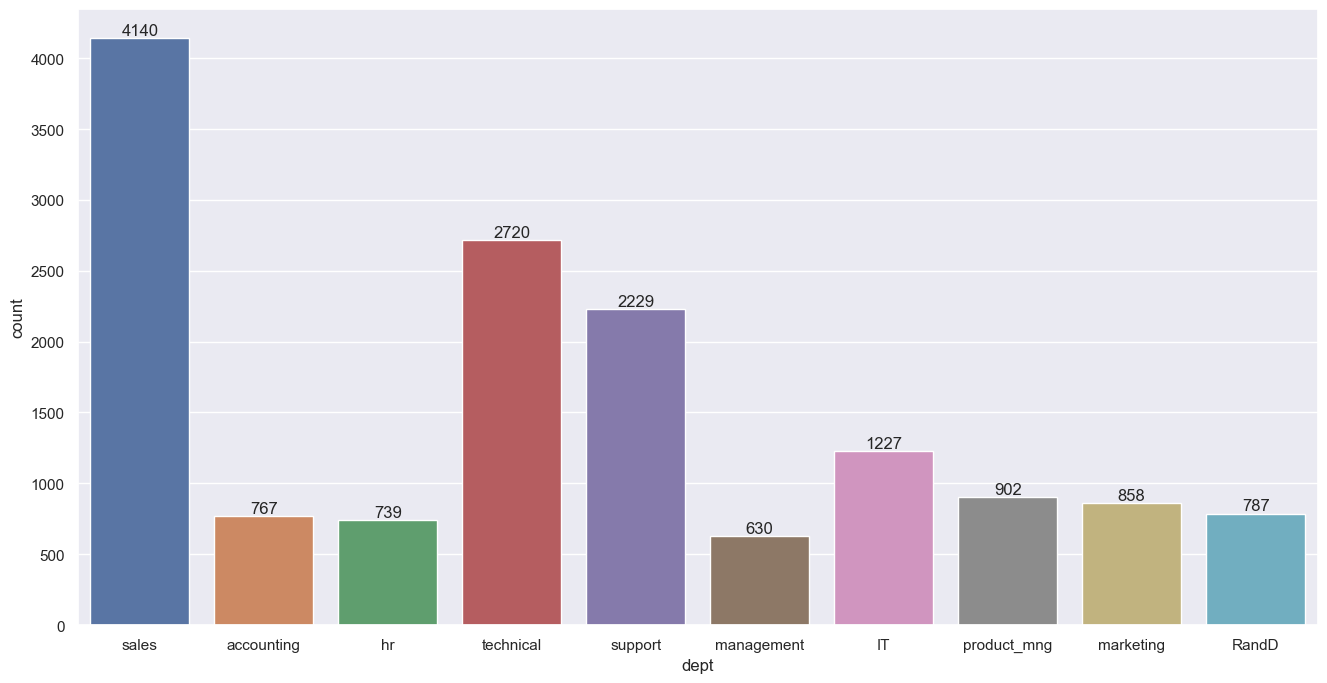

In [24]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
plt.figure(figsize=(16,8))
ax = sns.countplot(x='dept', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Answer: Sales department has most of employees

In [25]:
# Write code here
df_dept = df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_dept['Perc'] = df_dept['Perc']*100
df_dept

dept  left       Perc
0            IT     0  77.750611
1            IT     1  22.249389
2         RandD     0  84.625159
3         RandD     1  15.374841
4    accounting     0  73.402868
5    accounting     1  26.597132
6            hr     0  70.906631
7            hr     1  29.093369
8    management     0  85.555556
9    management     1  14.444444
10    marketing     0  76.340326
11    marketing     1  23.659674
12  product_mng     0  78.048780
13  product_mng     1  21.951220
14        sales     0  75.507246
15        sales     1  24.492754
16      support     0  75.100942
17      support     1  24.899058
18    technical     0  74.375000
19    technical     1  25.625000

<Axes: xlabel='dept', ylabel='Perc'>

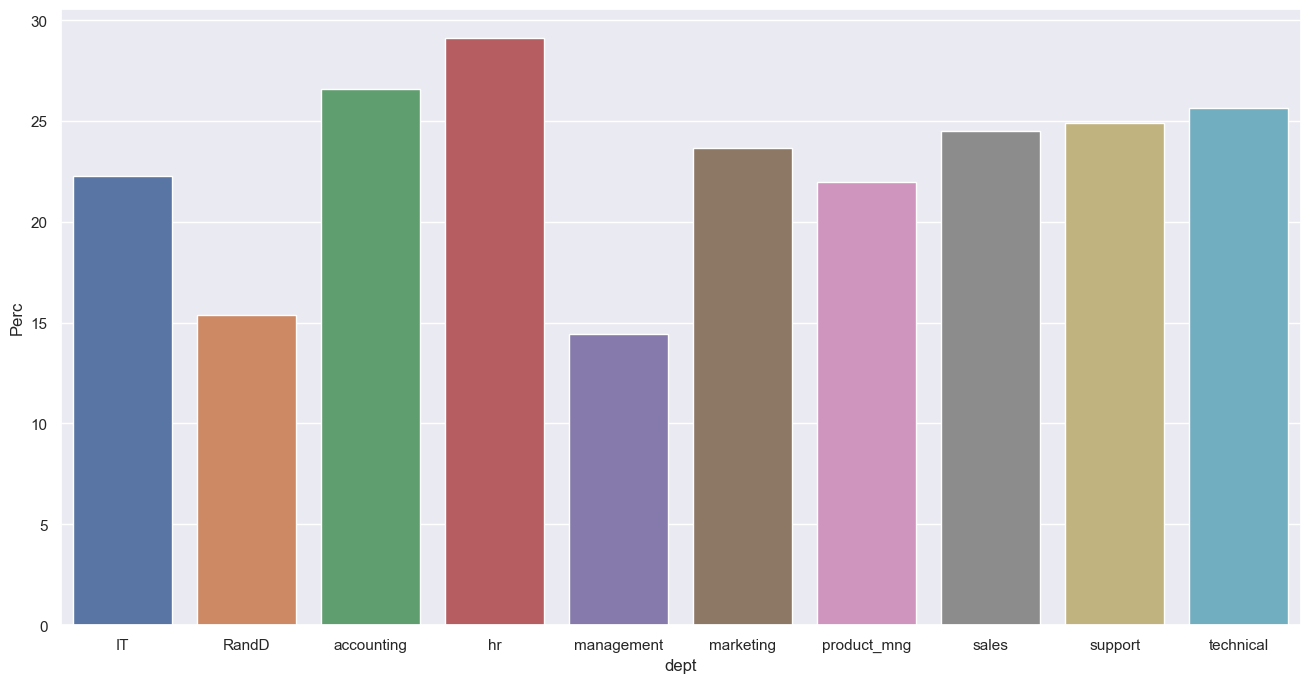

In [26]:
# Write code here to draw the plot
plt.figure(figsize=(16,8))
sns.barplot(x='dept',y='Perc', data = df_dept[df_dept['left']==1])

Answer: The above graph shows that most of the people leaving from accounting and hr dept.

## **Satisfaction Level**

<Axes: xlabel='satisfaction_level', ylabel='Density'>

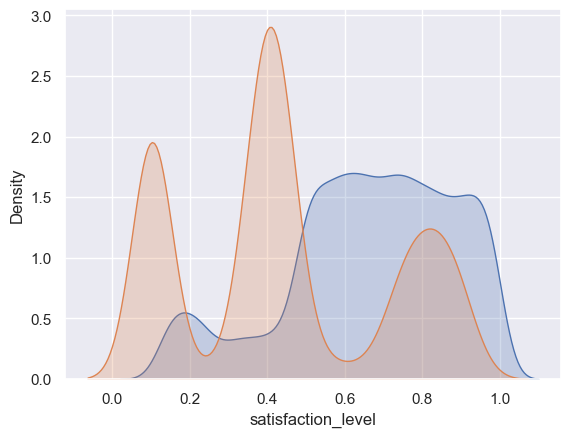

In [27]:
# Write the code here
sns.kdeplot(df[df['left']==0]['satisfaction_level'], fill=True)
sns.kdeplot(df[df['left']==1]['satisfaction_level'],fill=True)

Answer: Most of the employees who have less satisfaction level 0.5 most likely to leave


# Feature Engineering

In [28]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = ''

In [29]:
df.loc[df['satisfaction_level']>=0.5,'satisfaction_level_type'] = df.loc[df['satisfaction_level']>=0.5,'satisfaction_level_type'].replace('','High')
df.loc[df['satisfaction_level']<0.5,'satisfaction_level_type'] = df.loc[df['satisfaction_level']<0.5,'satisfaction_level_type'].replace('','low')

In [30]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years   dept  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary satisfaction_level_type  
0     low                     low  
1  medium                    High  
2  medium                     low  
3     low                    High  
4     low                     low

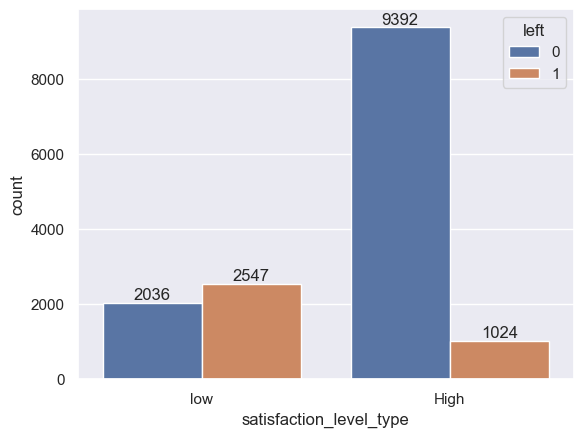

In [31]:
# Write Code Here
ax = sns.countplot(x='satisfaction_level_type', data =df, hue='left')
for bars in ax.containers:
    ax.bar_label(bars)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [32]:
# Write Code Here
proj_count = df.loc[df['satisfaction_level_type']=='High','number_project'].value_counts().reset_index(name='Proj_count')
proj_count

index  Proj_count
0      4        3807
1      3        3504
2      5        2281
3      2         591
4      6         228
5      7           5

<Axes: xlabel='index', ylabel='Proj_count'>

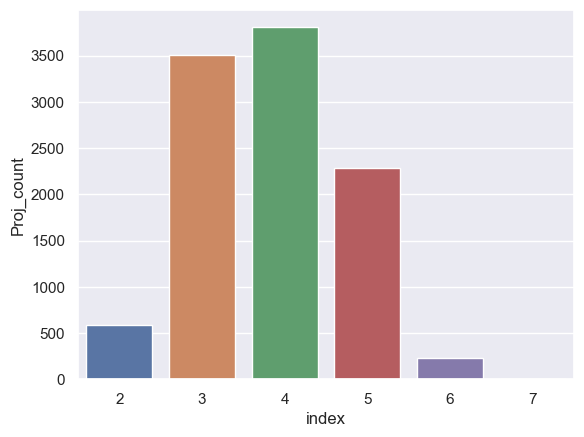

In [33]:
sns.barplot(x="index",y="Proj_count",data=proj_count)

**Answer:** from the above plot shows that the higher satisfaction level is associated with the number of projects such that number of projects per employee are in the range of 3 to 5

Now lets check number of projects for low satisfaction level

<Axes: xlabel='index', ylabel='Proj_count'>

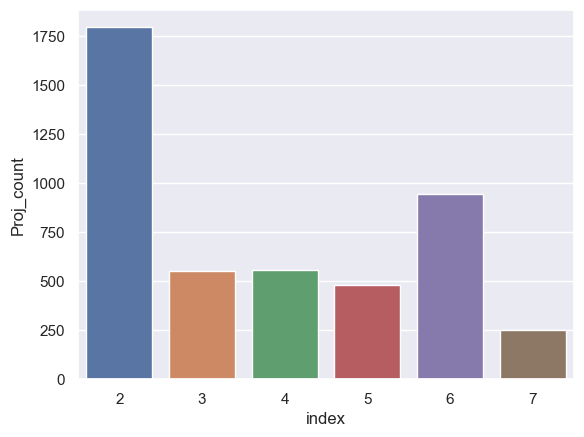

In [34]:
# Write Code Here
proj_count2 = df.loc[df['satisfaction_level_type']=='low','number_project'].value_counts().reset_index(name='Proj_count')
sns.barplot(x='index',y='Proj_count', data=proj_count2)

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

In [35]:
df['employee_type']=''

In [36]:
# Write code here`
df.loc[df['number_project']==2,'employee_type']=df.loc[df['number_project']==2,'employee_type'].replace('','unburdened')
df.loc[(df['number_project']>=3) & (df['number_project']<=5),'employee_type']=df.loc[(df['number_project']>=3) & (df['number_project']<=5),'employee_type'].replace('','Satisfactory')
df.loc[df['number_project']>=6,'employee_type']=df.loc[df['number_project']>=6,'employee_type'].replace('','Burdened')


In [37]:
df.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   

   time_spend_company  Work_accident  left  promotion_last_5years   dept  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   

   salary satisfaction_level_type employee_type  
0     low                     low    unburdened  
1  medium                    High  Satisfactory  
2  medium                     low      Burdened

<Axes: xlabel='employee_type', ylabel='count'>

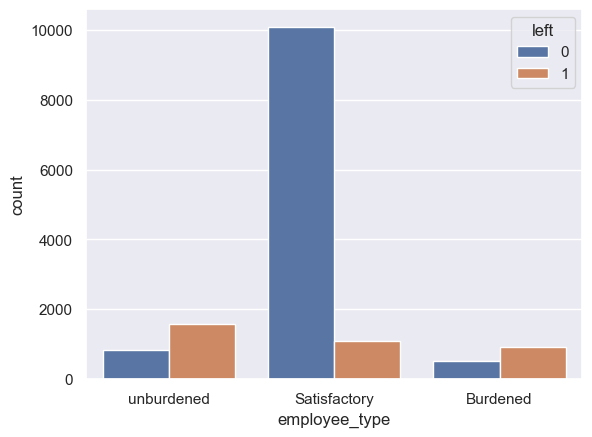

In [38]:
# Write code here
sns.countplot(x='employee_type', data=df, hue='left')

### Remove Redundant Features

In [39]:
# Write code here
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'satisfaction_level_type',
       'employee_type'],
      dtype='object')

# Machine Learning

In [40]:
# Write code here
df_OneHot = pd.get_dummies(df,columns=['dept', 'salary', 'satisfaction_level_type','employee_type'])
df_OneHot.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  dept_IT  \
0                   3              0     1                      0        0   
1                   6              0     1                      0        0   
2                   4              0     1                      0        0   
3                   5              0     1                      0        0   
4                   3              0     1                      0        0   

   dept_RandD  ...  dept_support  dept_technical  salary_high  salary_low  \
0           0  ...             0               0            0           1   
1           0  ...             0               0            0           0   
2           0  ...             0               0            0           0   
3           0  ...             0               0            0           1   
4           0  ...             0               0            0           1   

   salary_medium  satisfaction_level_type_High  satisfaction_level_type_low  \
0              0                             0                            1   
1              1                             1                            0   
2              1                             0                            1   
3              0                             1                            0   
4              0                             0                            1   

   employee_type_Burdened  employee_type_Satisfactory  \
0                       0                           0   
1                       0                           1   
2                       1                           0   
3                       0                           1   
4                       0                           0   

   employee_type_unburdened  
0                         1  
1                         0  
2                         0  
3                         0  
4                         1  

[5 rows x 26 columns]

In [41]:
# Write code here
df = df_OneHot.copy()
X=df.drop('left',axis=1)
Y=df['left']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Write code here
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.30,random_state=100)


In [44]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 25) (10499,)
(4500, 25) (4500,)


## Random Forest

In [45]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=100)

In [47]:
# Get predictions
rf_pred= clf_rf.predict(xtest)

**Precision**

In [48]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [49]:
#Write the code to calculate
rf_precision= precision_score(ytest,rf_pred)
rf_precision

0.9916666666666667

**Accuracy**

In [50]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [51]:
# Write the code to calculate
rf_acc= accuracy_score(ytest,rf_pred)
rf_acc

0.9917777777777778

**Recall**

In [52]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [53]:
# Write the code to calculate
rf_recall= recall_score(ytest,rf_pred)
rf_recall

0.9745222929936306

**F1-Score**

In [54]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [55]:
# Write the code to calculate
rf_f1_score= f1_score(ytest,rf_pred)
rf_f1_score

0.9830197338228546

**Classification Report**

In [56]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [57]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



### Hyperparameters Tuning Using Randomized Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
rf_rs = RandomForestClassifier(random_state=100)

In [60]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000,num=10)]
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]

In [61]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [62]:
rf_random = RandomizedSearchCV(estimator=rf_rs,param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   2.7s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   2.6s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   3.2s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   3.1s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   2.7s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   3.6s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   3.6s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   3.6s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   3.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   6.2s
[CV] END max_depth=None, min_samples_sp

[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   4.2s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   4.4s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   3.9s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   3.9s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   4.6s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.3s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.3s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.2s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END max_depth=60, 

[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.7s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.7s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.3s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   6.0s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   6.0s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   6.0s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=100, verbose=2)

In [63]:
#Selecting best estimator
clf_rf_rand = rf_random.best_estimator_


In [64]:
clf_rf_rand.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=50, n_estimators=890, random_state=100)

In [65]:
#prediction
pred_rf_rand = clf_rf_rand.predict(xtest)
prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:,1]

In [66]:
#Accuracy
from sklearn.metrics import accuracy_score
rf_rand_acc = accuracy_score(ytest,pred_rf_rand)
rf_rand_acc

0.9924444444444445

In [67]:
#Precision
from sklearn.metrics import precision_score
rf_rand_prec = precision_score(ytest,pred_rf_rand)
rf_rand_prec

0.9935125115848007

In [68]:
#Recall
from sklearn.metrics import recall_score
rf_rand_recall = recall_score(ytest,pred_rf_rand)
rf_rand_recall

0.9754322111010009

In [69]:
#F1 
from sklearn.metrics import f1_score
rf_rand_f1 = f1_score(ytest,pred_rf_rand)
rf_rand_f1

0.9843893480257117

In [70]:
#Classification_Report
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.99      0.98      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [72]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [73]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=25)
lr_model.fit(xtrain,ytrain)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=25)

In [74]:
# get the predictions
lr_pred= lr_model.predict(xtest)


In [75]:
lr_prb = lr_model.predict_proba(xtest)


Only predicting and extracting probability values of 1

In [76]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

# Comparison of Predicted and Actual

In [77]:
xtest.head()

satisfaction_level  last_evaluation  number_project  \
10155                0.72             0.76               4   
11688                0.94             0.90               4   
12598                0.37             0.46               2   
12192                0.74             0.91               4   
8678                 0.13             0.60               3   

       average_montly_hours  time_spend_company  Work_accident  \
10155                   189                   2              0   
11688                   144                   4              0   
12598                   157                   3              0   
12192                   232                   5              0   
8678                    178                   5              0   

       promotion_last_5years  dept_IT  dept_RandD  dept_accounting  ...  \
10155                      0        0           0                0  ...   
11688                      0        0           0                0  ...   
12598                      0        1           0                0  ...   
12192                      0        0           0                0  ...   
8678                       0        0           0                0  ...   

       dept_support  dept_technical  salary_high  salary_low  salary_medium  \
10155             1               0            0           0              1   
11688             1               0            0           1              0   
12598             0               0            0           1              0   
12192             0               1            0           0              1   
8678              1               0            0           1              0   

       satisfaction_level_type_High  satisfaction_level_type_low  \
10155                             1                            0   
11688                             1                            0   
12598                             0                            1   
12192                             1                            0   
8678                              0                            1   

       employee_type_Burdened  employee_type_Satisfactory  \
10155                       0                           1   
11688                       0                           1   
12598                       0                           0   
12192                       0                           1   
8678                        0                           1   

       employee_type_unburdened  
10155                         0  
11688                         0  
12598                         1  
12192                         0  
8678                          0  

[5 rows x 25 columns]

In [78]:
xt = xtest.copy()
xt['pred'] = lr_pred
xt['pred_probabilty'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

satisfaction_level  last_evaluation  number_project  \
10155                0.72             0.76               4   
11688                0.94             0.90               4   
12598                0.37             0.46               2   
12192                0.74             0.91               4   
8678                 0.13             0.60               3   

       average_montly_hours  time_spend_company  Work_accident  \
10155                   189                   2              0   
11688                   144                   4              0   
12598                   157                   3              0   
12192                   232                   5              0   
8678                    178                   5              0   

       promotion_last_5years  dept_IT  dept_RandD  dept_accounting  ...  \
10155                      0        0           0                0  ...   
11688                      0        0           0                0  ...   
12598                      0        1           0                0  ...   
12192                      0        0           0                0  ...   
8678                       0        0           0                0  ...   

       salary_low  salary_medium  satisfaction_level_type_High  \
10155           0              1                             1   
11688           1              0                             1   
12598           1              0                             0   
12192           0              1                             1   
8678            1              0                             0   

       satisfaction_level_type_low  employee_type_Burdened  \
10155                            0                       0   
11688                            0                       0   
12598                            1                       0   
12192                            0                       0   
8678                             1                       0   

       employee_type_Satisfactory  employee_type_unburdened  pred  \
10155                           1                         0     0   
11688                           1                         0     0   
12598                           0                         1     1   
12192                           1                         0     0   
8678                            1                         0     0   

       pred_probabilty  actual  
10155         0.043269       0  
11688         0.092336       0  
12598         0.773227       1  
12192         0.157916       1  
8678          0.242338       0  

[5 rows x 28 columns]

## Ada Boost

In [104]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [109]:

#Write the code here to make an instance and train the model with random state =100
ada_clf=AdaBoostClassifier(random_state=100)
ada_clf.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=100)

In [110]:
# Get the predictions
pred_clf_adb= ada_clf.predict(xtest)

**Accuracy**

In [113]:
#Write code here
adb_accuracy= accuracy_score(ytest,pred_clf_adb)
print(adb_accuracy)

0.9588888888888889


**Precision**

In [115]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
print(ab_precision)

0.9147005444646098


**Recall**

In [116]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
print(ab_recall)

0.9171974522292994


**F1-Score**

In [117]:
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
print(ab_f1_score)

0.9159472966833256


**Classification Report**

In [118]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3401
           1       0.91      0.92      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## XG Boost

In [119]:
#Write the code here to import the model
import xgboost

In [121]:
from xgboost import XGBClassifier

In [124]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = XGBClassifier(random_state=100)
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [125]:
# Get the predictions
pred_clf_xgb=clf_xgb.predict(xtest)

**Accuracy**

In [126]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)

**Precision**

In [128]:
#Write code here
xgb_precision= precision_score(ytest,pred_clf_xgb)

**Recall**

In [129]:
#Write code here
xgb_recall= recall_score(ytest,pred_clf_xgb)

**F1-Score**

In [130]:
#Write code here
xgb_f1_score= f1_score(ytest,pred_clf_xgb)

**Classification Report**

In [131]:
#Write code here
print(classification_report(ytest,pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



# Result Comparisons

In [133]:
# Write the code here
# Write the code here
compare_dict={"Model":['Random Forest','Logistic Regression','Ada Boost','XG boost'],
              "Accuracy":[rf_acc,lr_accuracy,ab_accuracy,xgb_accuracy],
              "Precision":[rf_precision, lr_precision,ab_precision,xgb_precision],
              "Recall":[rf_recall,lr_recall,ab_recall,xgb_recall],
              "F1_Score":[rf_f1_score,lr_f1_score,ab_f1_score,xgb_f1_score]}

In [134]:
comparison=pd.DataFrame(compare_dict)
comparison.sort_values(['F1_Score'], ascending=False)

Model  Accuracy  Precision    Recall  F1_Score
0        Random Forest  0.991778   0.991667  0.974522  0.983020
3             XG boost  0.989556   0.987941  0.969063  0.978411
2            Ada Boost  0.958889   0.914701  0.917197  0.915947
1  Logistic Regression  0.866667   0.754332  0.673339  0.711538